In [ ]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Description**

**Train.csv** - Personal records for about two-thirds (8700) of the passengers, to be used as training data.

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.

**PassengerId** - Id for each passenger in the test set.

**Transported** - The target. For each passenger, predict either True or False.

# Data Cleaning

In [ ]:
# Overview of the train dataset
df_train = pd.read_csv('train.csv')
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Overview of the test dataset
df_test = pd.read_csv('test.csv')
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Checking the shape of the dataset
print(df_train.shape)
print(df_test.shape)

(8693, 14)
(4277, 13)


In [ ]:
# Merging the two dataset
titanic = pd.concat([df_train, df_test])

In [ ]:
titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [ ]:
# Overview of the titanic dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [ ]:
# A description of the dataset
titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# Checking the description of all the columns in the dataset
titanic.describe(include= 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,12970,12682,12660,12671,12696,12700.000000,12674,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,12676,8693
unique,12970,3,2,9825,3,NaN,2,NaN,NaN,NaN,NaN,NaN,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Carry Contrevins,True
freq,1,6865,8079,8,8871,NaN,12401,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.771969,NaN,222.897852,451.961675,174.906033,308.476904,306.789482,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.387261,NaN,647.596664,1584.370747,590.558690,1130.279641,1180.097223,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,49.000000,77.000000,29.000000,57.000000,42.000000,NaN,NaN


In [ ]:
# Assigning a variable to the train dataset
df_titanic= df_train

In [ ]:
# Checking for null values 
print(df_titanic.isnull().sum())

print(df_test.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [ ]:
# Checking for unique values in passenger ID
df_train.PassengerId.unique()

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

In [ ]:
df_titanic.PassengerId.value_counts()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

In [ ]:
# Checking for the length of unique values in passebeger ID
len(df_titanic.PassengerId.unique())

8693

In [ ]:
# Checking for unique values in Name (fill with unknown)
df_titanic.Name.unique()

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      dtype=object)

In [ ]:
# Checking for length of unique values in Name
len(df_titanic.Name.unique())

8474

In [ ]:
# Checking for duplicated values in Name
df_titanic['Name'].duplicated().value_counts()

False    8474
True      219
Name: Name, dtype: int64

In [ ]:
# Extracting the group part of the passenger ID
df_titanic['passengerGroup'] = df_titanic.PassengerId.str.split('_').str[0]
df_test['passengerGroup'] = df_test.PassengerId.str.split('_').str[0]

In [ ]:
# Converting Passenger ID to integer
df_titanic['PassengerId'] = df_titanic['PassengerId'].astype(int)
df_test['PassengerId'] = df_test['PassengerId'].astype(int)

In [ ]:
# Converting Passenger ID to integer
df_titanic['passengerGroup'] = df_titanic['passengerGroup'].astype(int)
df_test['passengerGroup'] = df_test['passengerGroup'].astype(int)

In [ ]:
#c Checking for the number of unique values in cabin
len(df_titanic.Cabin.unique())

6561

In [ ]:
df_titanic.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [ ]:
# Checking for the value count 
df_titanic.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
# Splitting Cabin into different units for better visualization
df_titanic['cabinDeck'] = df_titanic.Cabin.str.split('/').str[0]
df_titanic['cabinNum']  = df_titanic.Cabin.str.split('/').str[1]
df_titanic['cabinSide'] = df_titanic.Cabin.str.split('/').str[2]

In [ ]:
# Splitting Cabin into different units for better visualization
df_test['cabinDeck'] = df_test.Cabin.str.split('/').str[0]
df_test['cabinNum']  = df_test.Cabin.str.split('/').str[1]
df_test['cabinSide'] = df_test.Cabin.str.split('/').str[2]

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   int64  
 1   HomePlanet      8492 non-null   object 
 2   CryoSleep       8476 non-null   object 
 3   Cabin           8494 non-null   object 
 4   Destination     8511 non-null   object 
 5   Age             8514 non-null   float64
 6   VIP             8490 non-null   object 
 7   RoomService     8512 non-null   float64
 8   FoodCourt       8510 non-null   float64
 9   ShoppingMall    8485 non-null   float64
 10  Spa             8510 non-null   float64
 11  VRDeck          8505 non-null   float64
 12  Name            8493 non-null   object 
 13  Transported     8693 non-null   bool   
 14  passengerGroup  8693 non-null   int64  
 15  cabinDeck       8494 non-null   object 
 16  cabinNum        8494 non-null   object 
 17  cabinSide       8494 non-null   o

In [ ]:
# Exploring Cabin Num
df_titanic.cabinNum.value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: cabinNum, Length: 1817, dtype: int64

In [ ]:
df_titanic.cabinNum.unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [ ]:
len(df_titanic.cabinNum.unique())

1818

In [ ]:
# Converting Cabin Num to float
df_titanic['cabinNum'] = df_titanic['cabinNum'].astype(float)
df_test['cabinNum'] = df_test['cabinNum'].astype(float)

In [ ]:
# Dropping the cabin column
df_titanic.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
df_titanic.sample(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
7494,801601,Earth,False,TRAPPIST-1e,15.0,False,0.0,10.0,0.0,595.0,381.0,Clard Edwartizman,False,8016,E,531.0,S
7717,823301,Earth,False,TRAPPIST-1e,30.0,False,0.0,0.0,779.0,0.0,18.0,Leene Balderts,False,8233,F,1575.0,S
636,66401,Europa,False,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,4507.0,5689.0,Jabba Cylistrand,False,664,E,46.0,S
1483,157301,Mars,False,TRAPPIST-1e,55.0,False,938.0,0.0,82.0,0.0,162.0,Lychex Butte,False,1573,D,56.0,S
7250,775101,Europa,True,55 Cancri e,41.0,False,0.0,0.0,0.0,0.0,0.0,Mesatik Retefule,True,7751,C,252.0,P


In [ ]:
# Checking for unique values in home planet 
len(df_titanic.HomePlanet.unique())

4

In [ ]:
df_titanic.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
# Checking for the value count (fill with mode)
df_titanic.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
# Checking for unique values in cryosleep 
len(df_titanic.CryoSleep.unique())

3

In [ ]:
df_titanic.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [ ]:
# Checking for the value count (fill with mode)
df_titanic.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [ ]:
# Checking for the number of unique values in Destination
len(df_titanic.Destination.unique())

4

In [ ]:
df_titanic.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
# Checking for the value count (fill with mode)
df_titanic.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
# Checking for the number of unique values in VIP
len(df_titanic.VIP.unique())

3

In [ ]:
df_titanic.VIP.unique()

array([False, True, nan], dtype=object)

In [ ]:
# Checking for the value count (fill with mode)
df_titanic.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

Text(0, 0.5, 'ShoppingMall')

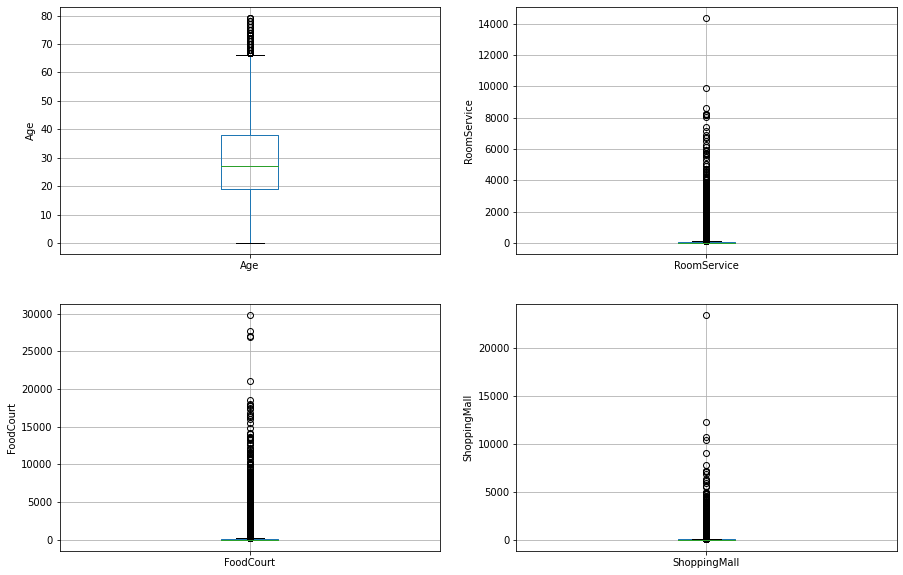

In [ ]:
# Plotting a box plot to check for outliers
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df_titanic.boxplot(column='Age')
fig.set_ylabel('Age')

plt.subplot(2,2,2)
fig = df_titanic.boxplot(column='RoomService')
fig.set_ylabel('RoomService')

plt.subplot(2,2,3)
fig = df_titanic.boxplot(column='FoodCourt')
fig.set_ylabel('FoodCourt')

plt.subplot(2,2,4)
fig = df_titanic.boxplot(column='ShoppingMall')
fig.set_ylabel('ShoppingMall')

Text(0, 0.5, 'cabinNum')

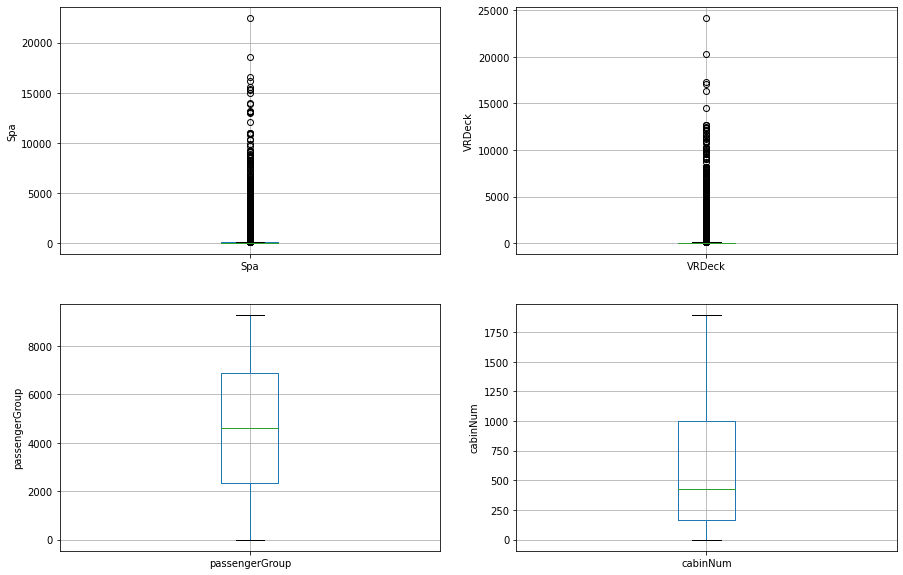

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df_titanic.boxplot(column='Spa')
fig.set_ylabel('Spa')

plt.subplot(2,2,2)
fig = df_titanic.boxplot(column='VRDeck')
fig.set_ylabel('VRDeck')

plt.subplot(2,2,3)
fig = df_titanic.boxplot(column='passengerGroup')
fig.set_ylabel('passengerGroup')

plt.subplot(2,2,4)
fig = df_titanic.boxplot(column='cabinNum')
fig.set_ylabel('cabinNum')

In [ ]:
df_titanic.sample(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
7908,845101,Mars,False,55 Cancri e,31.0,False,1997.0,0.0,0.0,0.0,0.0,Ale Start,False,8451,F,1625.0,S
3243,348503,Europa,False,TRAPPIST-1e,33.0,False,0.0,3157.0,0.0,131.0,0.0,Hamak Oillepint,True,3485,E,237.0,S
1763,187401,Earth,True,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Armene Woodgezalez,False,1874,G,305.0,P


**Filling null values in columns:**

No null values for PassengerId

The null values in the Homeplanet will be filled with mode of the column

The null values in the CryoSleep will be filled with mode of the column

The null values in the Cabin will be filled with Not Specified

The null values in the Destination will be filled mode of the column

The null values in the VIP will be filled mode of the column

The null values in the cabinDeck will be filled mode of the column

The null values in the cabinSide will be filled mode of the column

The null values in the Name will be filled with Unknown

The null values in the Age will be filled with mean of the column as there are limited outliers

The null values in the cabinNum will be filled with mean of the column as there are limited outliers

The null values in the RoomService will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the FoodCourt will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the ShoppingMall will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the Spa will be filled with median of the column as there are plenty outliers and median is robust to outliers

The null values in the VRdeck will be filled with median of the column as there are plenty outliers and median is robust to outliers




In [ ]:
df_titanic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693.0,NaN,NaN,NaN,463340.480156,267102.897363,101.0,231901.0,463001.0,688301.0,928002.0
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,NaN,NaN,NaN,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0


In [ ]:
# Filling null values
df_titanic['HomePlanet'] = df_titanic['HomePlanet'].fillna(df_titanic['HomePlanet'].mode()[0])
df_titanic['CryoSleep'] = df_titanic['CryoSleep'].fillna(df_titanic['CryoSleep'].mode()[0])
df_titanic['Destination'] = df_titanic['Destination'].fillna(df_titanic['Destination'].mode()[0])
df_titanic['VIP'] = df_titanic['VIP'].fillna(df_titanic['VIP'].mode()[0])
df_titanic['cabinDeck'] = df_titanic['cabinDeck'].fillna(df_titanic['cabinDeck'].mode()[0])
df_titanic['cabinSide'] = df_titanic['cabinSide'].fillna(df_titanic['cabinSide'].mode()[0])

In [ ]:
# Filling null values
df_titanic['Name'] = df_titanic['Name'].fillna('Unknown')

In [ ]:
# Filling null values
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
df_titanic['cabinNum'] = df_titanic['cabinNum'].fillna(df_titanic['cabinNum'].mean())
df_titanic['RoomService'] = df_titanic['RoomService'].fillna(df_titanic['RoomService'].median())
df_titanic['FoodCourt'] = df_titanic['FoodCourt'].fillna(df_titanic['FoodCourt'].median())
df_titanic['ShoppingMall'] = df_titanic['ShoppingMall'].fillna(df_titanic['ShoppingMall'].median())
df_titanic['Spa'] = df_titanic['Spa'].fillna(df_titanic['Spa'].median())
df_titanic['VRDeck'] = df_titanic['VRDeck'].fillna(df_titanic['VRDeck'].median())

In [ ]:
# Filling null values in the test dataset
df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0])
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0])
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode()[0])
df_test['VIP'] = df_test['VIP'].fillna(df_test['VIP'].mode()[0])
df_test['cabinDeck'] = df_test['cabinDeck'].fillna(df_test['cabinDeck'].mode()[0])
df_test['cabinSide'] = df_test['cabinSide'].fillna(df_test['cabinSide'].mode()[0])
df_test['Name'] = df_test['Name'].fillna('Unknown')
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['cabinNum'] = df_test['cabinNum'].fillna(df_test['cabinNum'].mean())
df_test['RoomService'] = df_test['RoomService'].fillna(df_test['RoomService'].median())
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(df_test['FoodCourt'].median())
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median())
df_test['Spa'] = df_test['Spa'].fillna(df_test['Spa'].median())
df_test['VRDeck'] = df_test['VRDeck'].fillna(df_test['VRDeck'].median())

In [ ]:
# Ensuring all null values have been filled
print(df_titanic.isnull().sum())
print(df_test.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
passengerGroup    0
cabinDeck         0
cabinNum          0
cabinSide         0
dtype: int64
PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
passengerGroup    0
cabinDeck         0
cabinNum          0
cabinSide         0
dtype: int64


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   int64  
 1   HomePlanet      8693 non-null   object 
 2   CryoSleep       8693 non-null   bool   
 3   Destination     8693 non-null   object 
 4   Age             8693 non-null   float64
 5   VIP             8693 non-null   bool   
 6   RoomService     8693 non-null   float64
 7   FoodCourt       8693 non-null   float64
 8   ShoppingMall    8693 non-null   float64
 9   Spa             8693 non-null   float64
 10  VRDeck          8693 non-null   float64
 11  Name            8693 non-null   object 
 12  Transported     8693 non-null   bool   
 13  passengerGroup  8693 non-null   int64  
 14  cabinDeck       8693 non-null   object 
 15  cabinNum        8693 non-null   float64
 16  cabinSide       8693 non-null   object 
dtypes: bool(3), float64(7), int64(2),

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     4277 non-null   int64  
 1   HomePlanet      4277 non-null   object 
 2   CryoSleep       4277 non-null   bool   
 3   Destination     4277 non-null   object 
 4   Age             4277 non-null   float64
 5   VIP             4277 non-null   bool   
 6   RoomService     4277 non-null   float64
 7   FoodCourt       4277 non-null   float64
 8   ShoppingMall    4277 non-null   float64
 9   Spa             4277 non-null   float64
 10  VRDeck          4277 non-null   float64
 11  Name            4277 non-null   object 
 12  passengerGroup  4277 non-null   int64  
 13  cabinDeck       4277 non-null   object 
 14  cabinNum        4277 non-null   float64
 15  cabinSide       4277 non-null   object 
dtypes: bool(2), float64(7), int64(2), object(5)
memory usage: 476.3+ KB


In [ ]:
df_titanic.Destination.value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

# Data Visualization

In [ ]:
df_titanic.sample(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
6404,676401,Mars,False,TRAPPIST-1e,32.00000,False,2937.0,60.0,696.0,0.0,0.0,Single Rake,False,6764,F,1294.0,S
1894,202601,Earth,True,TRAPPIST-1e,28.82793,False,0.0,0.0,0.0,0.0,0.0,Marlly Warrishales,True,2026,G,323.0,S
5513,588501,Earth,False,TRAPPIST-1e,41.00000,False,8.0,532.0,0.0,0.0,100.0,Danna Oneiles,True,5885,F,1123.0,S
1935,207101,Europa,False,55 Cancri e,45.00000,False,0.0,3559.0,0.0,3615.0,163.0,Zaninon Subateful,False,2071,C,78.0,S
3836,410601,Earth,False,TRAPPIST-1e,43.00000,False,0.0,831.0,78.0,0.0,0.0,Leneva Harmond,True,4106,G,675.0,S


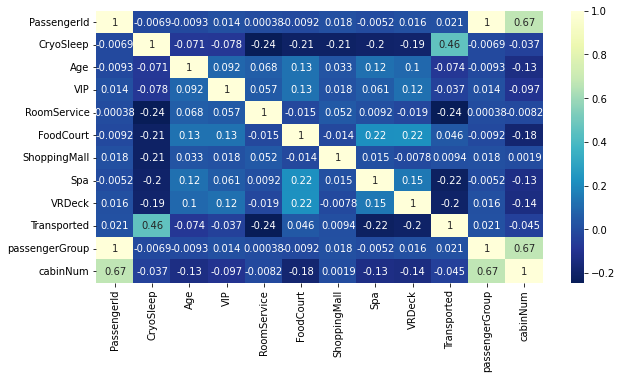

In [ ]:
# Plotting a correlation heatmap
plt.figure(figsize= (10,5))
sns.heatmap(df_titanic.corr(), cmap='YlGnBu_r', annot=True)

In [ ]:
# Checking the value counts of the homeplanet column
df_titanic.HomePlanet.value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

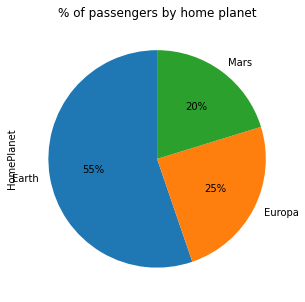

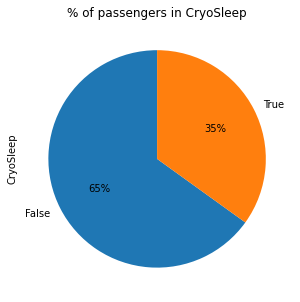

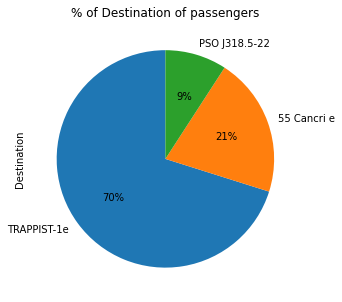

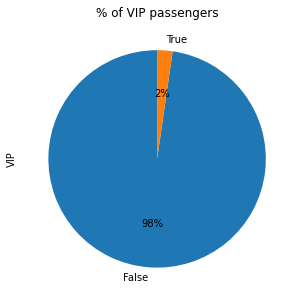

In [ ]:
ax1 = df_titanic['HomePlanet'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
                                              labels=df_titanic['HomePlanet'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax1.set_title('% of passengers by home planet', fontsize = 12)
plt.show()

ax2 = df_titanic['CryoSleep'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
                                              labels=df_titanic['CryoSleep'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax2.set_title('% of passengers in CryoSleep', fontsize = 12)
plt.show()

ax3 = df_titanic['Destination'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10,
                                               labels=df_titanic['Destination'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax3.set_title('% of Destination of passengers', fontsize = 12)
plt.show()

ax4 = df_titanic['VIP'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10,
                                               labels=df_titanic['VIP'].value_counts().index, startangle=90, autopct='%1.0f%%')
ax4.set_title('% of VIP passengers', fontsize = 12)
plt.show()

#plt.legend(loc='upper left');

In [ ]:
#fig, axes = plt.subplots(1, 3)

#axes[0].plot(df_titanic['HomePlanet'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
                                              #labels=df_titanic['HomePlanet'].value_counts().index, startangle=90, autopct='%1.0f%%')
#axes[0].set_title('% of passengers by home planet', fontsize = 12)

#axes[1].plot(df_titanic['CryoSleep'].value_counts(), kind='pie', figsize=(5,5), fontsize=10, 
                                              #labels=df_titanic['CryoSleep'].value_counts().index, startangle=90, autopct='%1.0f%%')
#axes[1].set_title('% of passengers in CryoSleep', fontsize = 12)

#axes[2].plot(df_titanic['Destination'].value_counts(), kind='pie', figsize=(5,5), fontsize=10,
                                               #startangle=90, autopct='%1.0f%%')
#axes[2].set_title('% of Destination of passengers', fontsize = 12)

#axes[3].plot(df_titanic['VIP'].value_counts(), kind='pie', figsize=(5,5), fontsize=10,
                                               #startangle=90, autopct='%1.0f%%')
#axes[3].set_title('% of VIP passengers', fontsize = 12)

#plt.legend(loc='upper left');

#plt.show()

Text(0.5, 1.0, 'VIP')

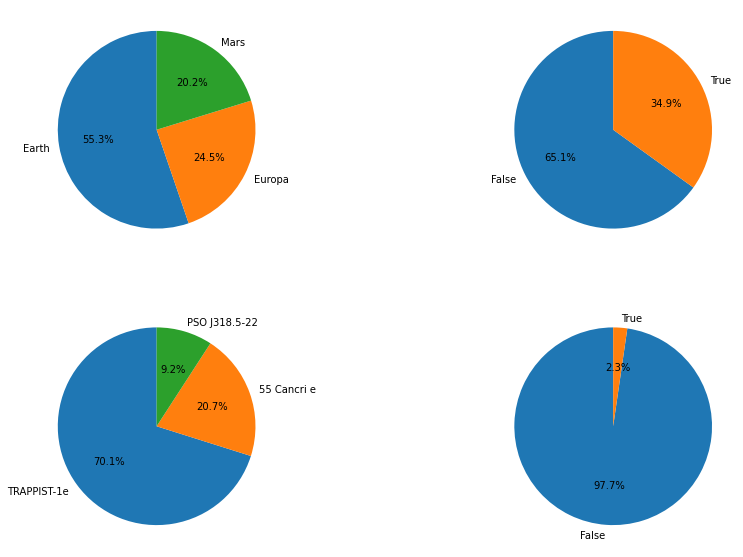

In [ ]:
fig, ax = plt.subplots(figsize =(15, 10))

plt.subplot(2,2,1)
fig = plt.pie(df_titanic['HomePlanet'].value_counts(), 
        labels=df_titanic['HomePlanet'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
#fig.set_title('HomePlanet')

plt.subplot(2,2,2)
fig = plt.pie(df_titanic['CryoSleep'].value_counts(), 
        labels=df_titanic['CryoSleep'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
ax2.set_title('CryoSleep')

plt.subplot(2,2,3)
fig = plt.pie(df_titanic['Destination'].value_counts(), 
        labels=df_titanic['Destination'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
ax3.set_title('Destination')

plt.subplot(2,2,4)
fig = plt.pie(df_titanic['VIP'].value_counts(), 
        labels=df_titanic['VIP'].value_counts().index,
        startangle=90, autopct = '%1.1f%%')
ax4.set_title('VIP')

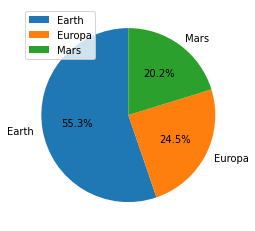

In [ ]:
# Plotting a pie chart for the homeplanet
plt.pie(df_titanic['HomePlanet'].value_counts(), 
        labels=df_titanic['HomePlanet'].value_counts().index,
        startangle=90, autopct = '%1.1f%%'
        
       )
plt.legend(loc='upper left');

More than half of the people on the spacaship are from planet Earth and approximately 21% and 24% Mars and Europa respectively.

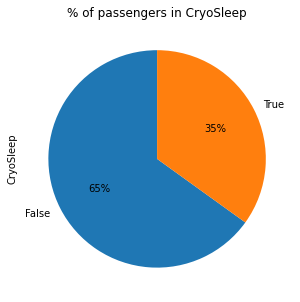

In [ ]:
# Percentage who uses cryosleep
df_titanic['CryoSleep'].value_counts().plot(kind='pie', figsize=(5,5), fontsize=10, 
labels=df_titanic['CryoSleep'].value_counts().index, startangle=90, autopct='%1.0f%%')
plt.title('% of passengers in CryoSleep', fontsize = 12)
plt.show()

A large perecentage of the passengers did not use the CryoSleep

In [ ]:
df_tit = df_titanic.drop(['PassengerId'], axis=1)

In [ ]:
# Grouping by cryosleep
df = df_tit.groupby('CryoSleep')
df.mean()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,passengerGroup,cabinNum
CryoSleep,,,,,,,,,,
False,29.571130,0.031471,338.143741,689.221535,260.62447,468.138437,458.414074,0.335042,4646.860149,613.942412
True,27.443823,0.006915,0.000000,0.000000,0.00000,0.000000,0.000000,0.817583,4608.302601,575.086561


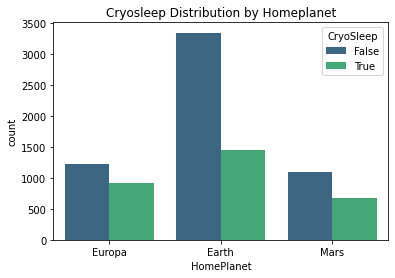

In [ ]:
# Visualing usage of cryosleep by planet 
sns.countplot(x='HomePlanet', hue= 'CryoSleep', data= df_titanic, palette= 'viridis' )
plt.title("Cryosleep Distribution by Homeplanet")
plt.show()

Passengers from earth have the highest number of people who did and didn't use the cryosleep; this makes sense because earth has the highest percentage of passengers aboard the spaceship. However, while roughly the same proportion of people from Europa and Mars did not use the cryosleep, Residents of Europa explore the use of the cryosleep more than people from Mars. 

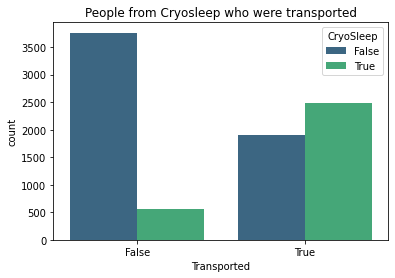

In [ ]:
sns.countplot(x='Transported', hue= 'CryoSleep', data= df_titanic, palette= 'viridis' )
plt.title("People from Cryosleep who were transported")
plt.show()

Most people who did not use the CryoSleep were not transported while a larger number of people who use the cryosleep were transported to destinations other thabn their preferred ones. 

In [ ]:
# Checking the destination of passengers on the spaceship
dest = df_titanic['Destination'].value_counts()
dest

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
# Checking destination by %
dest_rate = df_titanic['Destination'].value_counts() / 12970
dest_rate

TRAPPIST-1e      0.470085
55 Cancri e      0.138782
PSO J318.5-22    0.061372
Name: Destination, dtype: float64

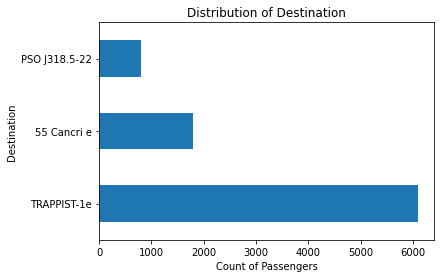

In [ ]:
# Visualizing destination
dest.plot(kind='barh')
plt.xlabel('Count of Passengers')
plt.ylabel('Destination')
plt.title('Distribution of Destination');

TRAPPIST-1e is the most preferred destination by passenegers on the titanic spaceship whereas PSO J318.5-22 is the least preferred destination. 

In [ ]:
# Checking destination by home planet
df_dest = df_titanic[['HomePlanet', 'Destination']].value_counts()
df_dest

HomePlanet  Destination  
Earth       TRAPPIST-1e      3354
Mars        TRAPPIST-1e      1517
Europa      TRAPPIST-1e      1226
            55 Cancri e       886
Earth       PSO J318.5-22     728
            55 Cancri e       721
Mars        55 Cancri e       193
            PSO J318.5-22      49
Europa      PSO J318.5-22      19
dtype: int64

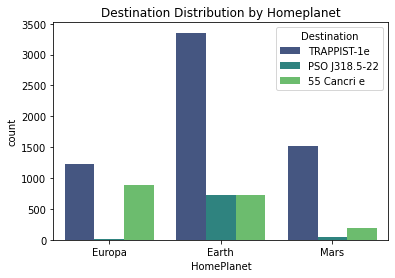

In [ ]:
# Visualizing destination by home planet
sns.countplot(x='HomePlanet', hue= 'Destination', data= df_titanic, palette= 'viridis' )
plt.title("Destination Distribution by Homeplanet")
plt.show()

TRAPPIST-1e is the highest chosen destination in all the planets. This is not surprising because a large percentage of the passsegers are going to TRAPPIST-1e. However, PSO J318.5-22 is the least preferred destination by both Mars and Europa residents as less than 100 passengers are going to this location, while PSO J318.5-22 and  55 Cancri e have equal number of people visiting from earth. 



In [ ]:
# Creating a dataframe for the count of people transported from different homeplanet
transported = df_titanic[['HomePlanet', 'Transported']].value_counts()
transported

HomePlanet  Transported
Earth       False          2749
            True           2054
Europa      True           1404
Mars        True            920
            False           839
Europa      False           727
dtype: int64

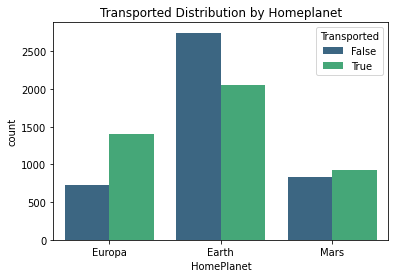

In [ ]:
# PLotting a count plot for home planet distribution by transported
sns.countplot(x='HomePlanet', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by Homeplanet")
plt.show()

Most earth residents were not transported to another dimension, whereas a higher number of passengers from Europa and Mars were transported to a dimension different from their desired destination. Europa has, shockingly,  the highest number of people transported to another dimension.

**this make me want to look at which cabin they occupy, the age group travelling, from this planet and whether they mostly travel as a group or an individual.**

In [ ]:
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
2173,231901,Earth,True,PSO J318.5-22,57.0,False,0.0,0.0,0.0,0.0,0.0,Evendy Estron,False,2319,G,373.0,P
1263,133701,Earth,False,55 Cancri e,35.0,False,775.0,14.0,0.0,610.0,4.0,Brank Shermann,False,1337,F,258.0,S


In [ ]:
# Checking if there is a correlation between the age and people transported to a different dimension
age_titanic = df_titanic[['Age', 'Transported']]

In [ ]:
age_titanic

,Age,Transported
0,39.0,False
1,24.0,True
2,58.0,False
3,33.0,False
4,16.0,True
...,...,...
8688,41.0,False
8689,18.0,False
8690,26.0,True
8691,32.0,False


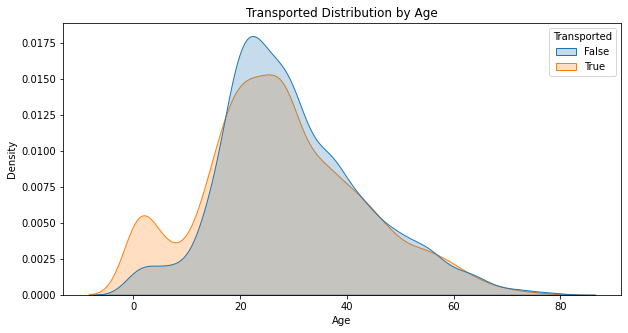

In [ ]:
# A KDE plot comparing age and trasnported
plt.figure(figsize=(10, 5))
sns.kdeplot(x='Age', hue= 'Transported', data= age_titanic, color= 'b', shade=True)
plt.title("Transported Distribution by Age")
plt.show()

Most of the children are kept in the cryosleep and this is understandable because it is most likely for safety.

In [ ]:
# Checking for relationship between age and transported
cryosleep_age = df_titanic[['Age', 'CryoSleep']]
cryosleep_age

,Age,CryoSleep
0,39.0,False
1,24.0,False
2,58.0,False
3,33.0,False
4,16.0,False
...,...,...
8688,41.0,False
8689,18.0,True
8690,26.0,False
8691,32.0,False


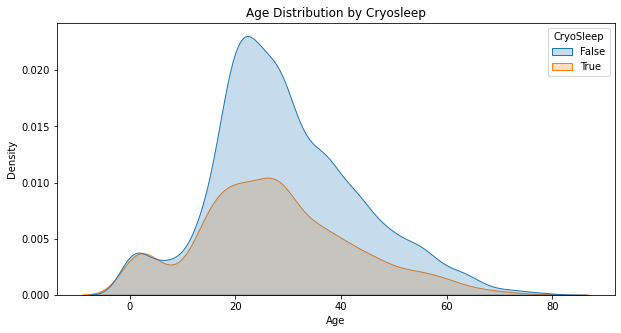

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x='Age', hue= 'CryoSleep', data= cryosleep_age, color= 'b', shade=True)
plt.title("Age Distribution by Cryosleep")
plt.show()

Surprisingly, the cryosleeep was mainly used by people within the age range 30 years and below. Although ages 20-30 yrs are approximately the largest age group on the spaceship, it is least expected that they will prefer to stay alone and not explore the luxury the spaceship has to offer.

In [ ]:
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
622,64701,Mars,True,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Lidex Deeke,True,647,F,115.0,S
7211,770302,Earth,True,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,Unknown,True,7703,G,1251.0,S


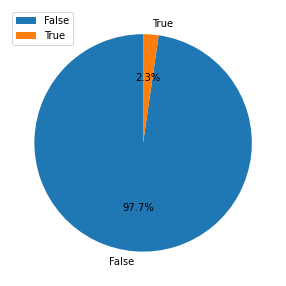

In [ ]:
# Plotting a pie chart for the homeplanet
plt.figure(figsize=(10, 5))

plt.pie(df_titanic['VIP'].value_counts(), 
        labels=df_titanic['VIP'].value_counts().index,
        startangle=90, autopct = '%1.1f%%'
        
       )
plt.legend(loc='upper left');

Significant proportion of the passenger did not opt for the VIP service. Just 2% of the passengers aboard the spaceship in VIP.

In [ ]:
# Checking for a relationship between VIP users and transported
VIP = df_titanic[['VIP', 'Transported']].value_counts()
VIP

VIP    Transported
False  True           4302
       False          4192
True   False           123
       True             76
dtype: int64

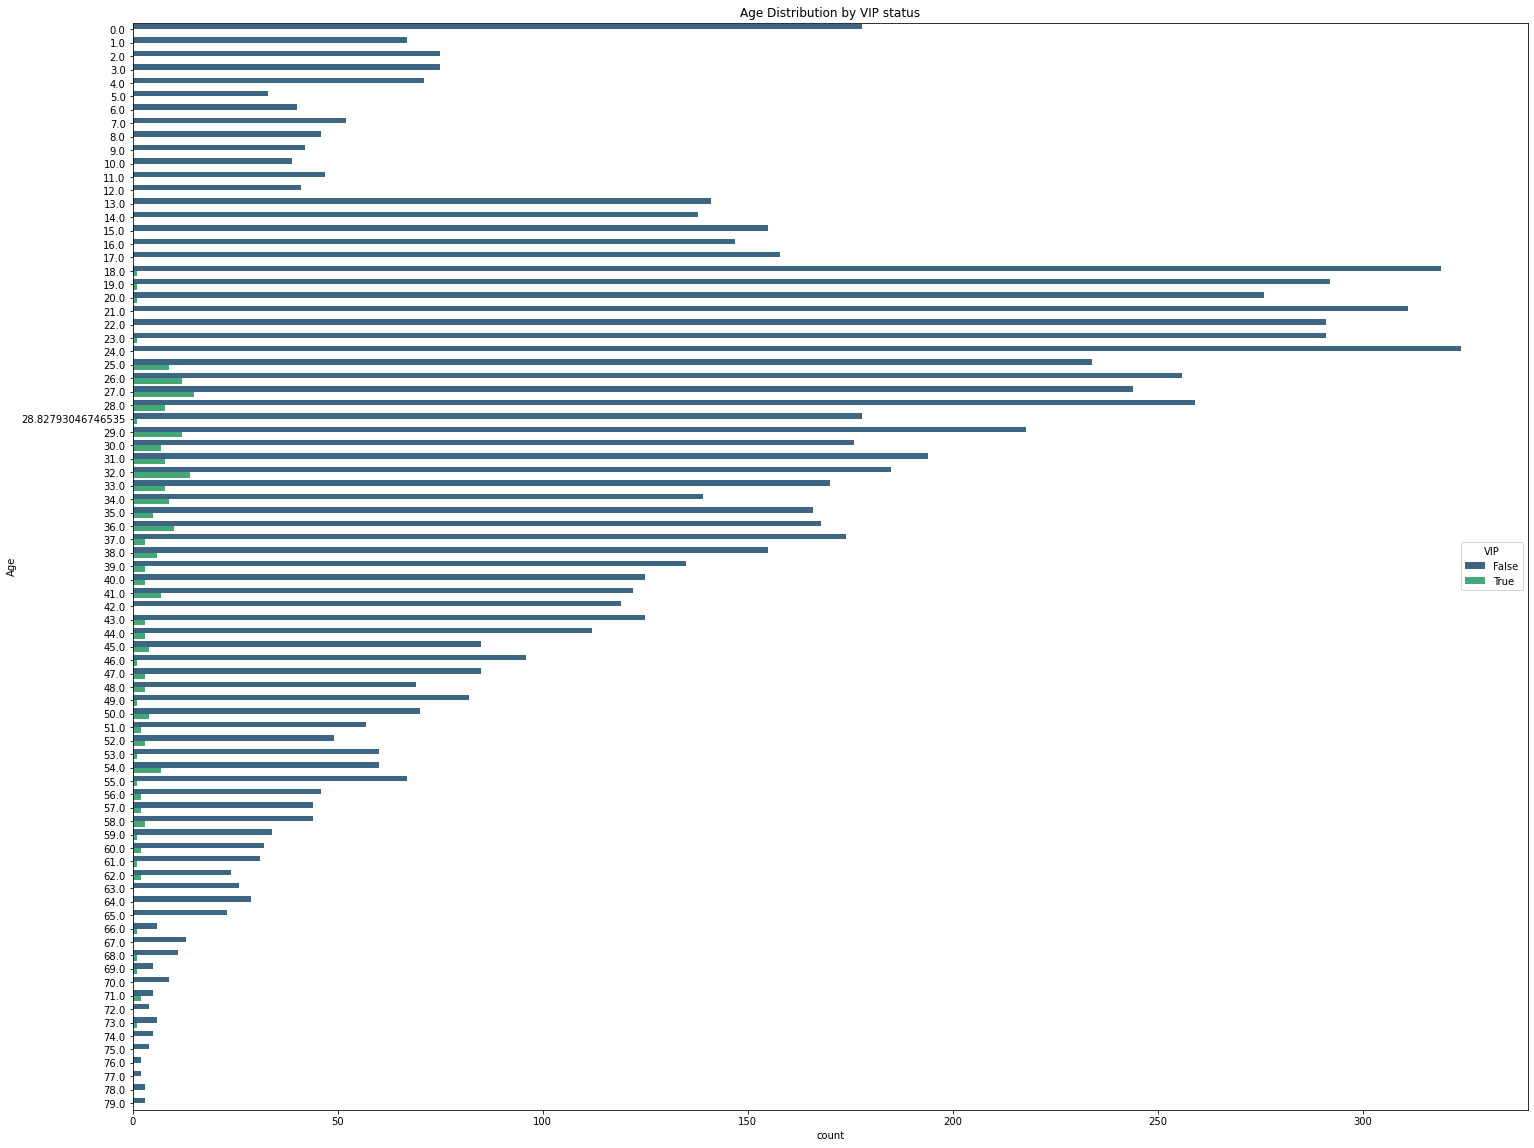

In [ ]:
plt.figure(figsize=(25, 20))
sns.countplot(y='Age', hue= 'VIP', data= df_titanic, palette= 'viridis')
plt.title("Age Distribution by VIP status")
plt.show()

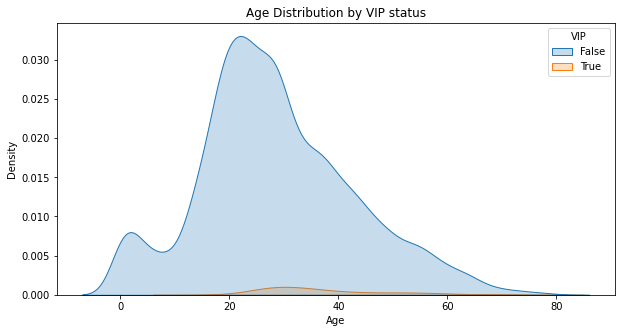

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x='Age', hue= 'VIP', data= df_titanic, color= 'b', shade=True)
plt.title("Age Distribution by VIP status")
plt.show()

The VIP service was majorly used by people between ages 20 - 40 years. This is unexpected as one would think that people 40years and above will prefer the VIP section mostly for privacy and comfort

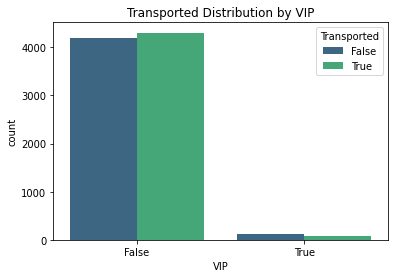

In [ ]:
# PLotting a countplot for transported distribution by VIP
sns.countplot(x='VIP', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by VIP")
plt.show()

The VIP section seem to have offered a bit of protection as more people using this service were not transported to a different dimension. Whereas, if only by a marginal distance, more people in the non-VIP section were transported to a different dimension than thier desired location.

In [ ]:
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide
2559,274601,Mars,False,TRAPPIST-1e,52.0,False,758.0,0.0,356.0,5.0,0.0,Apix Wala,False,2746,F,569.0,P
5217,556301,Europa,True,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Maham Cattyried,True,5563,C,176.0,P


Text(0.5, 1.0, 'passengerGroup')

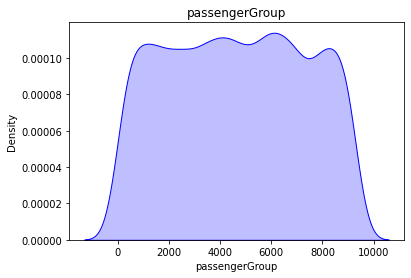

In [ ]:
sns.kdeplot(x='passengerGroup', data= df_titanic, color= 'b', shade=True)
plt.title('passengerGroup')

Text(0, 0.5, 'Spa')

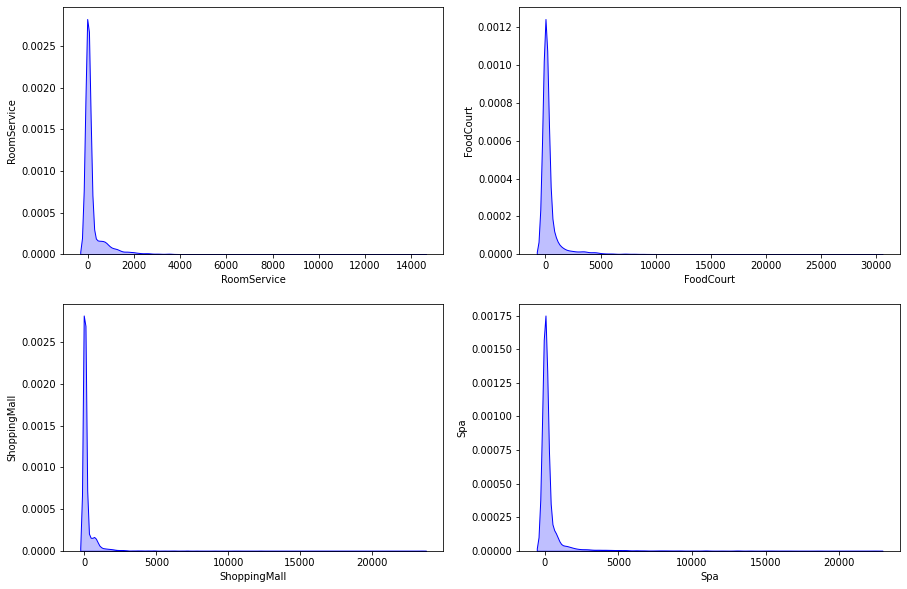

In [ ]:
# PLotting a subplot for the various services used on the spaceship
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = sns.kdeplot(x='RoomService', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('RoomService')

plt.subplot(2,2,2)
fig = sns.kdeplot(x='FoodCourt', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('FoodCourt')

plt.subplot(2,2,3)
fig = sns.kdeplot(x='ShoppingMall', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('ShoppingMall')

plt.subplot(2,2,4)
fig = sns.kdeplot(x='Spa', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('Spa')

Text(0, 0.5, 'cabinNum')

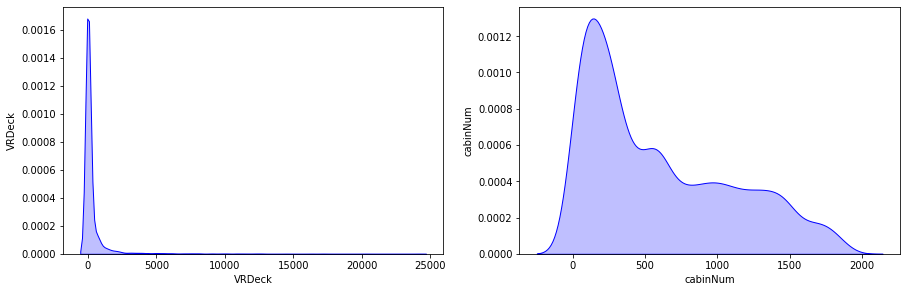

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = sns.kdeplot(x='VRDeck', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('VRDeck')

plt.subplot(2,2,2)
fig = sns.kdeplot(x='cabinNum', data= df_titanic, color= 'b', shade=True)
fig.set_ylabel('cabinNum')

From the subplot, it can be inferred that only a few of the passengers used the paid services on the spaceship. Also, the higher the cabin number, the lower the number of the passengers in the cabin

In [ ]:
# Checking the cabin side count
cabinside = df_titanic['cabinSide'].value_counts()
cabinside

S    4487
P    4206
Name: cabinSide, dtype: int64

In [ ]:
# Checking the cabin deck count
cabindeck = df_titanic['cabinDeck'].value_counts()
cabindeck

F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: cabinDeck, dtype: int64

Text(0, 0.5, 'cabinDeck')

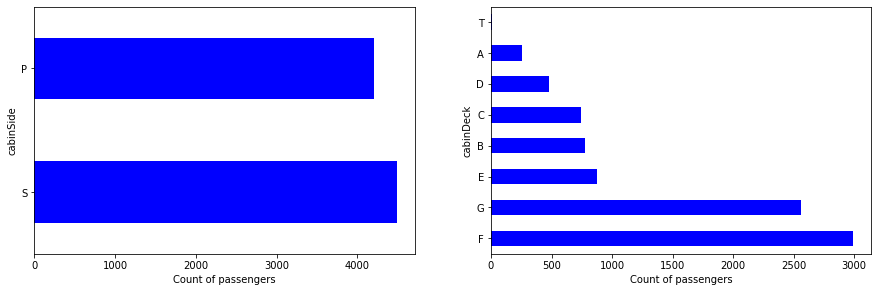

In [ ]:
# PLotting a subplot for the cabin side and deck
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = cabinside.plot(kind= 'barh', color= 'b')
plt.xlabel('Count of passengers')
plt.ylabel('Categories')
fig.set_ylabel('cabinSide')

plt.subplot(2,2,2)
fig = cabindeck.plot(kind= 'barh', color= 'b')
plt.xlabel('Count of passengers')
plt.ylabel('cabinDeck')
fig.set_ylabel('cabinDeck')

The starboard (s) is the most preffered cabin side by the passengers surpassing the port (p) only by a slight margin. The Cabin Deck F and G are the most used decks; while T and A are the least used deck. 

In [ ]:
# Creating a function that can group the paid services into a single column for each individual
def ServicesTotal(df):
  services = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
  df['Total_services'] = 0
  for col in services:
    df['Total_services'] += df[col]
  return df

ServicesTotal(df_titanic)
df_titanic.sample(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide,Total_services
2032,217201,Earth,False,PSO J318.5-22,23.0,False,0.0,774.0,0.0,0.0,0.0,Belly Barbes,True,2172,G,347.0,S,774.0
3703,398001,Earth,True,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Hencey Garrincent,True,3980,G,653.0,P,0.0


In [ ]:
df_vip_serv = df_titanic[['VIP', 'Total_services']]

In [ ]:
vip_services = df_vip_serv.groupby('VIP')
vip_services.size()

VIP
False    8494
True      199
dtype: int64

In [ ]:
# Comparing the transported columns and the total services used
df_serv_trans = df_titanic[['Transported', 'Total_services']]

In [ ]:
trans_services = df_serv_trans.groupby('Transported')
trans_services.size()

Transported
False    4315
True     4378
dtype: int64

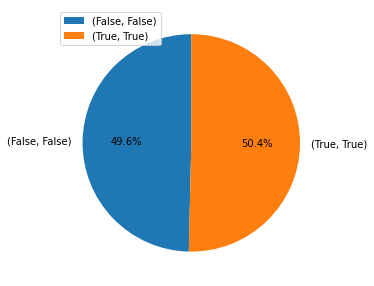

In [ ]:
plt.figure(figsize=(10, 5))

plt.pie(trans_services['Transported'].value_counts(), 
        labels=trans_services['Transported'].value_counts().index,
        startangle=90, autopct = '%1.1f%%'
        
       )
plt.legend(loc='upper left');

There is no distinct correlation of transported betweeen people who explored teh luxury service available on the spaceship and people who didnt. 

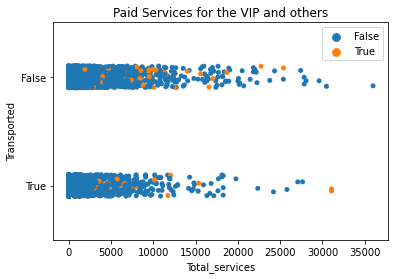

In [ ]:
sns.stripplot(data=df_titanic, x='Total_services', hue='VIP', y='Transported', orient='h')
plt.title('Paid Services for the VIP and others')
plt.legend()

In [ ]:
Cabin_Deck = df_titanic['cabinDeck'].value_counts()
Cabin_Deck

F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: cabinDeck, dtype: int64

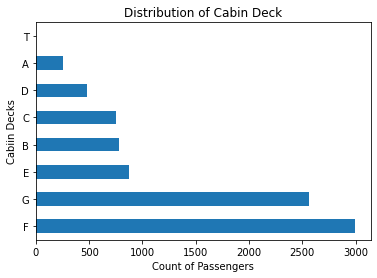

In [ ]:
Cabin_Deck.plot(kind='barh')
plt.xlabel('Count of Passengers')
plt.ylabel('Cabiin Decks')
plt.title('Distribution of Cabin Deck');

In [ ]:
CabinDeck_Trans = df_titanic[['cabinDeck', 'Transported']]
CabinDeck_Trans

,cabinDeck,Transported
0,B,False
1,F,True
2,A,False
3,A,False
4,F,True
...,...,...
8688,A,False
8689,G,False
8690,G,True
8691,E,False


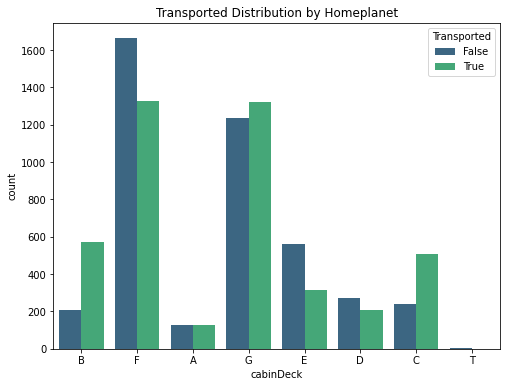

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cabinDeck', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by Homeplanet")
plt.show()

Text(0.5, 1.0, 'Cabin Services by VIP')

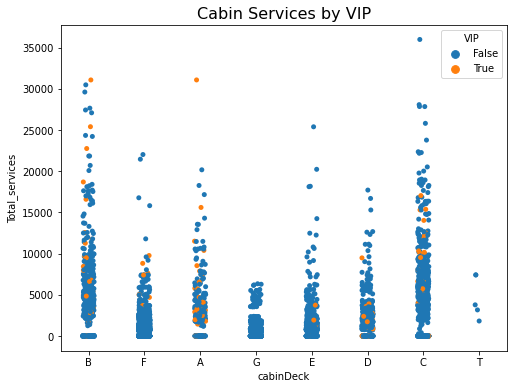

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df_titanic, x='cabinDeck', y='Total_services', hue='VIP' ).set_title('Cabin Services by VIP', fontsize=16)

In [ ]:
Cabin_Side = df_titanic['cabinSide'].value_counts()
Cabin_Side

S    4487
P    4206
Name: cabinSide, dtype: int64

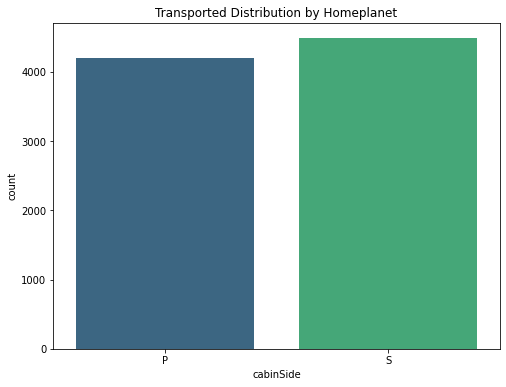

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cabinSide', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by Homeplanet")
plt.show()

In [ ]:
CabinSide_Trans = df_titanic[['cabinSide', 'Transported']]
CabinSide_Trans

,cabinSide,Transported
0,P,False
1,S,True
2,S,False
3,S,False
4,S,True
...,...,...
8688,P,False
8689,S,False
8690,S,True
8691,S,False


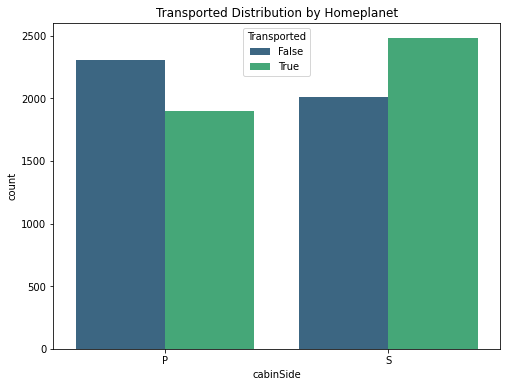

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cabinSide', hue= 'Transported', data= df_titanic, palette= 'viridis')
plt.title("Transported Distribution by Homeplanet")
plt.show()

Text(0.5, 1.0, 'Cabin Services by VIP')

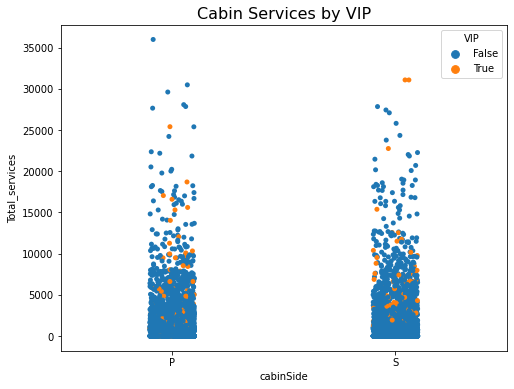

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df_titanic, x='cabinSide', y='Total_services', hue='VIP' ).set_title('Cabin Services by VIP', fontsize=16)

In [ ]:
Cabin_Deck = df_titanic['cabinNum'].value_counts()
Cabin_Deck

600.367671     199
82.000000       28
86.000000       22
19.000000       22
56.000000       21
              ... 
1644.000000      1
1515.000000      1
1639.000000      1
1277.000000      1
1894.000000      1
Name: cabinNum, Length: 1818, dtype: int64

In [ ]:
CabinNum_Trans = df_titanic[['cabinNum', 'Transported']]
CabinNum_Trans

,cabinNum,Transported
0,0.0,False
1,0.0,True
2,0.0,False
3,0.0,False
4,1.0,True
...,...,...
8688,98.0,False
8689,1499.0,False
8690,1500.0,True
8691,608.0,False


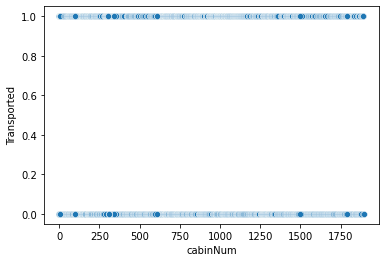

In [ ]:
sns.scatterplot(x="cabinNum",
                    y="Transported",
                    data=CabinNum_Trans)

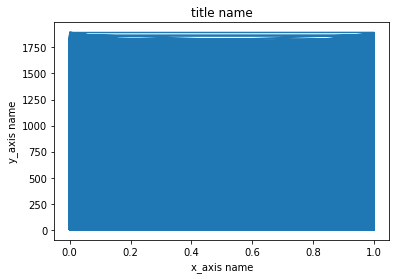

In [ ]:
plt.plot('Transported', 'cabinNum', data= CabinNum_Trans)
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')
plt.show()

Text(0.5, 1.0, 'Cabin Services by VIP')

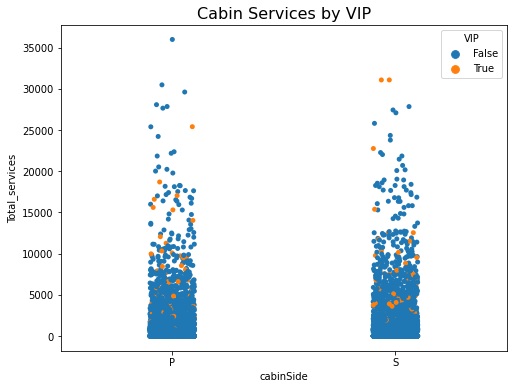

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df_titanic, x='cabinSide', y='Total_services', hue='VIP' ).set_title('Cabin Services by VIP', fontsize=16)

In [ ]:
home_destination = pd.pivot_table(data=df_titanic, columns=['HomePlanet'], index=['Destination'], values=['cabinDeck'], aggfunc='count')
home_destination

cabinDeck             
HomePlanet        Earth Europa  Mars
Destination                         
55 Cancri e         721    886   193
PSO J318.5-22       728     19    49
TRAPPIST-1e        3354   1226  1517

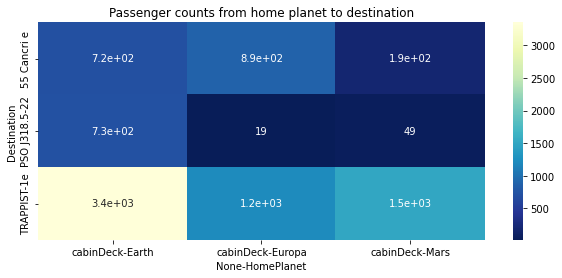

In [ ]:
plt.figure(figsize=(10,4))
home_destination = pd.pivot_table(data=df_titanic, columns=['HomePlanet'], index=['Destination'], values=['cabinDeck'], aggfunc='count')
sns.heatmap(home_destination,cmap='YlGnBu_r', annot=True).set_title('Passenger counts from home planet to destination')
plt.show()

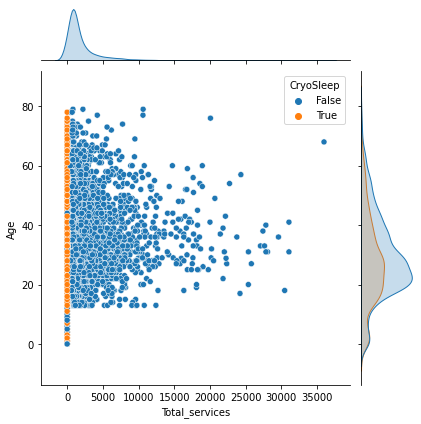

In [ ]:
sns.jointplot(data=df_titanic, x='Total_services', y='Age', hue='CryoSleep')
plt.show()

In [ ]:
df_titanic.passengerGroup.value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: passengerGroup, Length: 6217, dtype: int64

In [ ]:
df_titanic.passengerGroup.unique()

array([   1,    2,    3, ..., 9278, 9279, 9280])

In [ ]:
len(df_titanic.passengerGroup.unique())

6217

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Groups size')

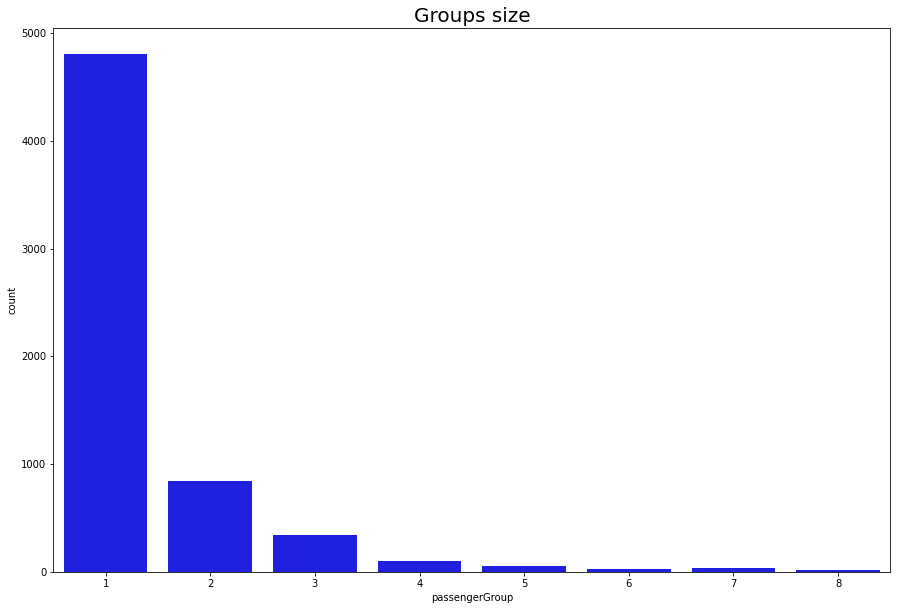

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(df_titanic.passengerGroup.value_counts(), color='b').set_title('Groups size', fontsize=20)

In [ ]:
df_europa = df_titanic[df_titanic['HomePlanet'] == 'Europa']
df_europa.head(2)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,passengerGroup,cabinDeck,cabinNum,cabinSide,Total_services
0,101,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0.0,P,0.0
2,301,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,0.0,S,10383.0


In [ ]:
europa_cabinD = df_europa[['cabinDeck', 'HomePlanet']]
europa_cabinD

,cabinDeck,HomePlanet
0,B,Europa
2,A,Europa
3,A,Europa
9,B,Europa
10,B,Europa
...,...,...
8686,A,Europa
8687,A,Europa
8688,A,Europa
8691,E,Europa


In [ ]:
europa_cabindeck= europa_cabinD.groupby('cabinDeck')
europa_cabindeck.size()

cabinDeck
A    252
B    766
C    734
D    186
E    128
F     61
T      4
dtype: int64

In [ ]:
europa_cabinS = df_europa[['cabinSide', 'HomePlanet']]
europa_cabinS

,cabinSide,HomePlanet
0,P,Europa
2,S,Europa
3,S,Europa
9,P,Europa
10,P,Europa
...,...,...
8686,P,Europa
8687,P,Europa
8688,P,Europa
8691,S,Europa


In [ ]:
europa_cabinside = europa_cabinS.groupby('cabinSide')
europa_cabinside.size()

cabinSide
P     955
S    1176
dtype: int64

Text(0, 0.5, 'cabinSide')

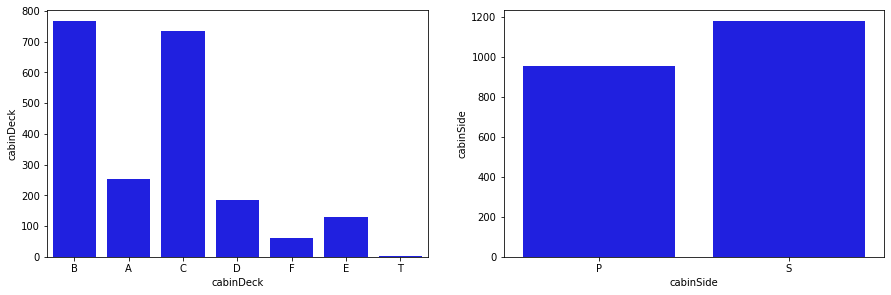

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = sns.countplot(x='cabinDeck', data= df_europa, color= 'b')
fig.set_ylabel('cabinDeck')

plt.subplot(2,2,2)
fig = sns.countplot(x='cabinSide', data= df_europa, color= 'b')
fig.set_ylabel('cabinSide')
